# Machine Learning Homework 5
#### Student: Liyan Xu

## 1. Illustrating the “curse of dimensionality”
#### For a hypersphere of radius $a$ in $d$ dimensions, the volume is related to the surface area of a unit hypersphere ($S$) as

$$V=\dfrac{S \times a^d}{d}$$

#### (a) Use this result to show that the fraction of the volume which lies at values of the radius between $a - \epsilon$ and $a$, where $0 < \epsilon < a$, is given by $f = 1 - (1 - \epsilon / a)^d$. Hence, show that for any fixed $\epsilon$, no matter how small, this fraction tends to $1$ as $d \to \infty$.

Since it is unit hypersphere, we have $V=\dfrac{S \times a^d}{d} = 1$.
$$
\begin{align}
f = V_a - V_{a - \epsilon} &= \dfrac{S \times a^d}{d} - \dfrac{S \times (a- \epsilon)^d}{d}\\
&= \dfrac{S}{d} [a^d - (a- \epsilon)^d]\\
&= \dfrac{S \times a^d}{d} [1 - (1 - \epsilon / a)^d]\\
&= 1 - (1 - \epsilon / a)^d
\end{align}
$$

For any fixed $\epsilon$ such that $0 < \epsilon < a$, we have $0 < 1 - \epsilon / a < 1$.

Therefore, $(1 - \epsilon / a)^d \to 0$ when $d \to \infty$. Therefore, $f = 1 - (1 - \epsilon / a)^d \to 1$ when $d \to \infty$.

#### (b) Evaluate the ratio $f$ numerically by plotting the results for different values of $\epsilon / a = 0.01$ and $d = 1, 10, 100$, and $1000$.

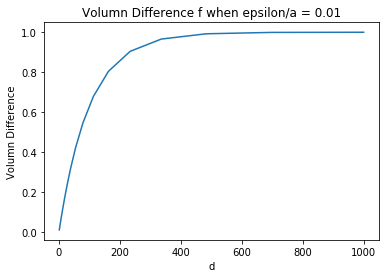

In [170]:
# Plot volumn difference
from math import pow

def calc_f(eps_over_a, d):
    return 1 - pow(1 - eps_over_a, d)

eps_over_a = 0.01
ds = np.logspace(0, 3, 20)
fs = [calc_f(eps_over_a, d) for d in ds]

ax = plt.gca()
ax.plot(ds, fs)
plt.xlabel('d')
plt.ylabel('Volumn Difference')
plt.title('Volumn Difference f when epsilon/a = 0.01')
plt.show()

#### (c) What conclusions can you draw from the plot?

Even for a very small change $\epsilon$ on radius $a$, the volumn difference $f$ can be very significant when dimension $d$ is large. When $d \to \infty$, volumn difference $f$ has the same volumn as the original hypersphere.

For randomly distributed data in unit hypersphere with radius $a$, half of the data will lie in the volumn between radius $a$ and $a - \epsilon$, because $V_a = f = 1$ when $d \to \infty$. This means the majority of data will lie around the surface of hypersphere. All data points will be far way from the origin.

## 2. PCA & NMF
#### Load the college dataset Colleges.txt provided.

#### (a) Preprocess the data by removing missing data and properly dealing with categorical data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# Read data
df = pd.read_csv("Colleges.txt", index_col=0, sep='\t')
df.shape

(1302, 17)

In [4]:
df.head()

,apps received,apps accepted,new stud enrolled,% new stud from top 10%,% new stud from top 25%,num FT undergrad,num PT undergrad,in-state tuition,out-of-state tuition,room,board,add fees,est book costs,est personal costs,% fac with PHD,stud:fac ratio,graduation rate
college name,,,,,,,,,,,,,,,,,
Alaska Pacific University,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska at Fairbanks,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
University of Alaska Southeast,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
University of Alaska at Anchorage,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
Alabama Agri. & Mech. Univ.,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [6]:
# Show count of NaN for each column
df.isnull().sum(axis=0)

apps received               10
apps accepted               11
new stud enrolled            5
% new stud from top 10%    235
% new stud from top 25%    202
num FT undergrad             3
num PT undergrad            32
in-state tuition            30
out-of-state tuition        20
room                       321
board                      498
add fees                   274
est book costs              48
est personal costs         181
% fac with PHD              32
stud:fac ratio               2
graduation rate             98
dtype: int64

In [8]:
# Remove rows with NaN
df=df.dropna()
df.shape

(471, 17)

Summary:
* Use "college name" as row identifier. All other features are numerical variables.
* Remove rows with any missing values. The resulting set has shape $(471, 17)$.

#### (b) Run PCA on this processed data. Report how many components were needed to capture 95% of the variance in the normalized data. Discuss what characterizes the first 3 principal components (i.e., which original features are important).

In [14]:
# Run PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(df.values)
print('To capture 95%% of variance, %d components are used.' % pca.n_components_)

To capture 95% of variance, 3 components are used.


In [33]:
# Examine the first 3 principal components
feature_idx = np.argsort(np.abs(pca.components_), axis=1)
print(feature_idx)

[[12 14 15  4  3 16 11  9 10 13  2  6  1  0  8  5  7]
 [15 13 16 14  3  4 12 11 10  9  6  2  1  7  8  5  0]
 [15  4  3 12 16 14 10 11  9 13  7  2  8  1  6  5  0]]


In [40]:
# Print top 3 features in each principal component
print(df.columns[feature_idx[0, :-4:-1]])
print(df.columns[feature_idx[1, :-4:-1]])
print(df.columns[feature_idx[2, :-4:-1]])

Index(['in-state tuition', 'num FT undergrad', 'out-of-state tuition'], dtype='object')
Index(['apps received', 'num FT undergrad', 'out-of-state tuition'], dtype='object')
Index(['apps received', 'num FT undergrad', 'num PT undergrad'], dtype='object')


Summary:
* To capture 95% of the variance, $3$ components are used.
* Top 3 features in the 1st principal component: 'in-state tuition', 'num FT undergrad', 'out-of-state tuition'
* Top 3 features in the 2nd principal component: 'apps received', 'num FT undergrad', 'out-of-state tuition'
* Top 3 features in the 3rd principal component: 'apps received', 'num FT undergrad', 'num PT undergrad'

#### (c) Normalize the data (where applicable) and run PCA on the normalized data. Report how many components were needed to capture 95% of the variance in the normalized data. Discuss what characterizes the first 3 principal components (i.e., which original features are important).

In [43]:
# Normalize data
from sklearn.preprocessing import normalize
college_normalized = normalize(df.values, axis=0)
college_normalized.shape

(471, 17)

In [44]:
# Run PCA
pca = PCA(n_components=0.95)
pca.fit(college_normalized)
print('To capture 95%% of variance, %d components are used.' % pca.n_components_)

To capture 95% of variance, 8 components are used.


In [46]:
# Examine the first 3 principal components
feature_idx = np.argsort(np.abs(pca.components_[:3, :]), axis=1)
print(feature_idx)
print(df.columns[feature_idx[0, :-4:-1]])
print(df.columns[feature_idx[1, :-4:-1]])
print(df.columns[feature_idx[2, :-4:-1]])

[[10 16  9 12  8  4 15  3 14 13  7 11  6  0  1  2  5]
 [ 2  5 12 11 14 10  1 15 13  9 16  0  4  8  6  7  3]
 [ 5 16 13 14 12  2  9  0 15  4  1 10  3  8  7  6 11]]
Index(['num FT undergrad', 'new stud enrolled', 'apps accepted'], dtype='object')
Index(['% new stud from top 10%', 'in-state tuition', 'num PT undergrad'], dtype='object')
Index(['add fees', 'num PT undergrad', 'in-state tuition'], dtype='object')


Summary:
* To capture 95% of the variance, $8$ components are used.
* Top 3 features in the 1st principal component: 'num FT undergrad', 'new stud enrolled', 'apps accepted'
* Top 3 features in the 2nd principal component: '% new stud from top 10%', 'in-state tuition', 'num PT undergrad'
* Top 3 features in the 3rd principal component: 'add fees', 'num PT undergrad', 'in-state tuition'

#### (d) Discuss why you should normalize the data before performing PCA.

PCA tries to maximize the variance along the principal components. Because the scale of data can influence the variance, if data is not normalized, it is likely that PCA will fit the components along the large-scale features, which makes PCA perform badly. Normalization can transform all features to unit scale, which helps to reflect true variance.

#### (e) Run NMF on the normalized data using R = 3. Discuss what characterizes the 3 components. How much variance does it capture?

In [54]:
# Run NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=3)
W = nmf.fit_transform(college_normalized)
nmf.components_.shape

(3, 17)

In [55]:
# Examine components
feature_idx = np.argsort(nmf.components_, axis=1)
print(feature_idx)
print(df.columns[feature_idx[0, :-4:-1]])
print(df.columns[feature_idx[1, :-4:-1]])
print(df.columns[feature_idx[2, :-4:-1]])

[[ 5  6  2  1  0 11 13 15  3 14 12  4  9 10 16  8  7]
 [ 6  7 13 12 15 10  8  9 16 14  4  3 11  5  2  1  0]
 [ 0  7  3  8 11  4 16  1  9 10 14 12  2 15  5 13  6]]
Index(['in-state tuition', 'out-of-state tuition', 'graduation rate'], dtype='object')
Index(['apps received', 'apps accepted', 'new stud enrolled'], dtype='object')
Index(['num PT undergrad', 'est personal costs', 'num FT undergrad'], dtype='object')


In [61]:
# Compute variance
college_nmf = W @ nmf.components_
var_orig = np.sum(np.var(college_normalized, axis=0))
var_nmf = np.sum(np.var(college_nmf, axis=0))
print('NMF with 3 components captures %.2f%% variance.' % (var_nmf * 100 / var_orig))

NMF with 3 components captures 68.39% variance.


Summary:
* Top 3 features in the 3 components are:
    * 'in-state tuition', 'out-of-state tuition', 'graduation rate'
    * 'apps received', 'apps accepted', 'new stud enrolled'
    * 'num PT undergrad', 'est personal costs', 'num FT undergrad'
* NMF with 3 components captures $68.39\%$ variance.

## 3. Predicting Loan Defaults with k-Nearest Neighbors
#### Consider the Loan Defaults dataset from Homework #3, loan default.csv. You will be using k-NN to predict whether or not a customer will default on a loan.

#### (a) Preprocess the dataset for k-NN. What did you do and why?

In [123]:
# Read data
df = pd.read_csv("loan_default.csv", index_col=0)

# Fill out NA on emp_length feature with 5 years
df['emp_length'] = df['emp_length'].fillna('5 years')

# Encode ordinal features
df['term'] = df['term'].astype('category').cat.codes

df['grade'] = df['grade'].astype('category').cat.codes

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype('int64')

df['earliest_cr_line'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['earliest_cr_line'] = df['earliest_cr_line'].astype('int64')

dict_cat = {
    'verification_status': {
        'Not Verified': 0,
        'Source Verified': 1,
        'Verified': 2
    }
}
df.replace(dict_cat, inplace=True)

# Encode non-ordinal features
# Merge small and similar categories
dict_cat = {
    'purpose': {
        'wedding': 'vacation',
        'renewable_energy': 'other'
    }
}
df.replace(dict_cat, inplace=True)

df = pd.get_dummies(df, columns=["home_ownership"])
df = pd.get_dummies(df, columns=["purpose"])

In [63]:
# Get features and label after preparing data
y = df['class'].values
X = df.drop(columns='class').values

In [64]:
# Define method to split data into training and test set
def split_training_test_set(X, y, test_ratio):
    idx_random = np.arange(y.shape[0])
    np.random.shuffle(idx_random)
    idx_split = int(test_ratio * y.shape[0])

    X_test = X[idx_random[:idx_split]]
    y_test = y[idx_random[:idx_split]]
    X_train = X[idx_random[idx_split:]]
    y_train = y[idx_random[idx_split:]]
    
    return X_train, y_train, X_test, y_test

In [66]:
# Prepare training and test set
from sklearn.preprocessing import StandardScaler
test_ratio = 0.2

X_train, y_train, X_test, y_test = split_training_test_set(X, y, test_ratio)

print(X_train.shape)
print(X_test.shape)

# Standardize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

(2280, 37)
(570, 37)


Summary:
1. Data are splitted into training and test set in a $8:2$ ratio. The reason for putting 20% of data as test set is that, we can keep a relatively large training set while we still have a descent amount of test samples.
2. Categorical features are encoded. The resulting dataset has $37$ features.
    1. If the categories are **ordinal**, do **label encoding**.
    2. If categories are **non-ordinal**, do **one-hot encoding**.
3. Standardization is performed.

#### (b) Build a k-NN nearest neighbor classifier on the dataset. What was your model assessment and selection strategy (e.g., what were you hyperparameters)? What were the optimal hyperparameters?

In [73]:
# Grid search n_neighbors by 5-fold CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

r_nn = np.arange(3, 15, 2)
grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': r_nn}, scoring='f1', cv=5, n_jobs=4)
grid.fit(X_train_std, y_train)

nn = grid.best_params_['n_neighbors']
f1_valid_best = grid.best_score_
print('Using 5-fold CV, the best n_neighbors is %d, and mean validation f1 score is %.3f' % (nn, f1_valid_best))

Using 5-fold CV, the best n_neighbors is 3, and mean validation f1 score is 0.408


Summary:
* Select model using 5-fold Cross-Validation. Hyper-parameter is n_neighbors.
* Grid search is performed given a range of n_neighbors.
* Evaluation metric is F1 score.
* The optimal n_neighbors is $3$.

#### (c) Evaluate the best k-NN model using the hyperparameters from (b). In other words, how well does it do on the test data?

In [76]:
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=nn)
knn.fit(X_train_std, y_train)

f1_test = f1_score(y_test, knn.predict(X_test_std))
print('The F1 score on test set is %.3f' % f1_test)

The F1 score on test set is 0.414


## 4. Predicting Loan Defaults with Neural Networks
#### Consider the Loan Defaults dataset from Homework #3, loan default.csv. You will be using neural networks to predict whether or not a customer will default on a loan. Note that neural networks can be quite expensive you might want to use a beefier machine to do this.

#### (a) Preprocess the dataset for neural networks. What did you do and why?

Use the same preprocessing from Q3:
1. Data are splitted into training and test set in a $8:2$ ratio. The reason for putting 20% of data as test set is that, we can keep a relatively large training set while we still have a descent amount of test samples.
2. Categorical features are encoded. The resulting dataset has $37$ features.
    1. If the categories are **ordinal**, do **label encoding**.
    2. If categories are **non-ordinal**, do **one-hot encoding**.
3. Standardization is performed.

#### (b) Build a feedforward neural network on your dataset. How did you select hyperparameters and what were the optimal hyperparameters?

In [89]:
# Grid search parameters by 5-fold CV
from sklearn.neural_network import MLPClassifier

r_hl = [(5, ), (10,), (20,), (5, 5), (10, 10)]

r_alpha = [5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]

r_lr = [5e-4, 1e-3, 5e-3, 1e-2]

grid = GridSearchCV(
    MLPClassifier(max_iter=1000),
    param_grid={
        'hidden_layer_sizes': r_hl,
        'alpha': r_alpha,
        'learning_rate_init': r_lr
    }, scoring='f1', cv=5, n_jobs=4)
grid.fit(X_train_std, y_train)

hl_best = grid.best_params_['hidden_layer_sizes']
alpha_best = grid.best_params_['alpha']
lr_best = grid.best_params_['learning_rate_init']
f1_valid_best = grid.best_score_

print('The best hidden_layer_sizes is %s' % (hl_best,))
print('The best alpha is %.5f' % alpha_best)
print('The best learning_rate is %.3f' % lr_best)
print('The mean validation f1 score is %.3f' % f1_valid_best)

The best hidden_layer_sizes is 20
The best alpha is 0.01000
The best learning_rate is 0.001
The mean validation f1 score is 0.608


Summary:
* Select hyper-parameters using 5-fold Cross-Validation.
* Grid search is performed.
* Evaluation metric is F1 score.
* The optimal hidden_layer_sizes is $(20,)$.
* The optimal alpha is $0.01$.
* The optimal learning_rate is $0.001$.

#### (c) Evaluate the best neural model using the hyperparameters from (b). In other words, how well does it do on the test data?

In [96]:
ffnn = grid.best_estimator_

f1_test = f1_score(y_test, ffnn.predict(X_test_std))
print('The F1 score on test set is %.3f' % f1_test)

The F1 score on test set is 0.627


## 5. Model Bake-off for Predicting Loan Defaults
#### We will consider a new test subsample loan default 2.csv from the Lending Club Loan Data to compare various models and determine the ’best’ model for this dataset. All the models will be evaluated on this new test subsample in terms of AUC, F1, and F2.

#### (a) Select the top 5 features from the dataset (loan default.csv) and build an unregularized logistic regression model. Specify how you select the top 5 features. How well does it perform on the new test subsample?

Preprocess training and test data.

In [112]:
# Read data
df_test = pd.read_csv("loan_default_v2.csv")

# Fill out missing values
df_test['emp_length'] = df_test['emp_length'].fillna('5 years')

# Encode ordinal features
df_test['term'] = df_test['term'].astype('category').cat.codes

df_test['grade'] = df_test['grade'].astype('category').cat.codes

df_test['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df_test['emp_length'] = df_test['emp_length'].astype('int64')

df_test['earliest_cr_line'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df_test['earliest_cr_line'] = df_test['earliest_cr_line'].astype('int64')

dict_cat = {
    'verification_status': {
        'Not Verified': 0,
        'Source Verified': 1,
        'Verified': 2
    }
}
df_test.replace(dict_cat, inplace=True)

In [113]:
# Encode non-ordinal features

# Merge small and similar categories
dict_cat = {
    'purpose': {
        'wedding': 'vacation',
        'renewable_energy': 'other'
    }
}
df_test.replace(dict_cat, inplace=True)

df_test = pd.get_dummies(df_test, columns=["home_ownership"])
df_test = pd.get_dummies(df_test, columns=["purpose"])

df_test.dtypes

loan_amnt                       int64
term                             int8
int_rate                      float64
installment                   float64
grade                            int8
emp_length                      int64
annual_inc                    float64
verification_status             int64
dti                           float64
delinq_2yrs                     int64
earliest_cr_line                int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
recoveries                    float64
collections_12_mths_ex_med      int64
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal                     int64
total_rev_hi_lim                int64
class                           int64
home_ownership_MORTGAGE         uint8
home_ownership_OTHER            uint8
home_ownersh

Notice that df_test has a new categorical value for home_ownership: home_ownership_OTHER. Add this column to the previous training set at the same position.

In [124]:
# Add home_ownership_OTHER column to training set
df['home_ownership_OTHER'] = 0
df = pd.concat((df.loc[:, :'home_ownership_MORTGAGE'],
                df['home_ownership_OTHER'],
                df.loc[:, 'home_ownership_OWN':'purpose_vacation']),
               axis=1)
df.dtypes

loan_amnt                       int64
term                             int8
int_rate                      float64
installment                   float64
grade                            int8
emp_length                      int64
annual_inc                    float64
verification_status             int64
dti                           float64
delinq_2yrs                     int64
earliest_cr_line                int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
recoveries                    float64
collections_12_mths_ex_med      int64
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal                     int64
total_rev_hi_lim              float64
class                           int64
home_ownership_MORTGAGE         uint8
home_ownership_OTHER            int64
home_ownersh

In [125]:
# Get test set
y_test = df_test['class'].values
X_test = df_test.drop(columns='class').values
print(X_test.shape)

# Get training set
y_train = df['class'].values
X_train = df.drop(columns='class').values
print(X_train.shape)

(5700, 38)
(2850, 38)


In [126]:
# Standardize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [128]:
# Get top 5 features (selected from Q2 Random Forest in HW4)
col_top5 = [17, 2, 4, 6, 8]
df.columns[col_top5]

Index(['recoveries', 'int_rate', 'grade', 'annual_inc', 'dti'], dtype='object')

In [135]:
# Prepare dataset using top 5 features
X_train_std_top5 = X_train_std[:, col_top5]
X_test_std_top5 = X_test_std[:, col_top5]
print(X_train_std_top5.shape)
print(X_test_std_top5.shape)

(2850, 5)
(5700, 5)


In [148]:
# Define method to evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, roc_auc_score

def report_scores(identifier, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_predicted)
    f2 = fbeta_score(y_test, y_predicted, beta=2)
    
    print('%s: AUC is %.3f, F1 is %.3f, F2 is %.3f' % (identifier, auc, f1, f2))
    
    return auc, f1, f2

In [149]:
# Evaluate logistic regression
lgr = LogisticRegression(C=1e8)
auc_lgr, f1_lgr, f2_lgr = report_scores('logistic regression', lgr,
                                        X_train_std_top5, y_train, X_test_std_top5, y_test)

logistic regression: AUC is 0.839, F1 is 0.662, F2 is 0.556


Summary:
* Select top 5 features: 'recoveries', 'int_rate', 'grade', 'annual_inc', 'dti'. These are selected from Random Forest feature importance top 5 (Q2 in HW4).
* Evaluation on test set: AUC is $0.839$, F1 is $0.662$, F2 is $0.556$

#### (b) Starting from Homework 3, you’ve used decision trees, random forests, SVM, k-NN and neural networks. For each of these 5 models, re-train the model using the optimal hyperparameters from your homeworks (you should avoid re-tuning to save yourself time) on all of the 2850 training data loan default.csv. How well does it perform on the new test subsample?

Evaluate all five models on the new test set by computing AUC, F1, F2.

In [151]:
# Evaluate decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=11, min_samples_leaf=0.089)
auc_dtc, f1_dtc, f2_dtc = report_scores('decision tree', dtc, X_train_std, y_train, X_test_std, y_test)

decision tree: AUC is 0.831, F1 is 0.658, F2 is 0.546


In [156]:
# Evaluate random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=25, max_depth=20, min_samples_leaf=0.068, max_features=0.6)
auc_rfc, f1_rfc, f2_rfc = report_scores('random forest', rfc, X_train_std, y_train, X_test_std, y_test)

random forest: AUC is 0.841, F1 is 0.658, F2 is 0.546


In [157]:
# Evaluate SVM
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=600, probability=True)
auc_svc, f1_svc, f2_svc = report_scores('SVM', svc, X_train_std, y_train, X_test_std, y_test)

SVM: AUC is 0.752, F1 is 0.575, F2 is 0.582


In [158]:
# Evaluate k-NN
knn = KNeighborsClassifier(n_neighbors=3)
auc_knn, f1_knn, f2_knn = report_scores('k-NN', knn, X_train_std, y_train, X_test_std, y_test)

k-NN: AUC is 0.668, F1 is 0.453, F2 is 0.405


In [159]:
# Evaluate neural network
ffnn = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.01, learning_rate_init=0.001, max_iter=1000)
auc_ffnn, f1_ffnn, f2_ffnn = report_scores('FFNN', ffnn, X_train_std, y_train, X_test_std, y_test)

FFNN: AUC is 0.810, F1 is 0.638, F2 is 0.566


#### (c) Using the model from (a) as the baseline, how does all the more ’complex’ models compare to the baseline? Compare and contrast the various models with respect to interpretability, computation time, and predictive performance. If you were the loan officer using this model, which one would you use to guide whether or not to give a loan?

In [162]:
# Show table of scores
table = pd.DataFrame(
    [[auc_lgr, auc_dtc, auc_rfc, auc_svc, auc_knn, auc_ffnn],
    [f1_lgr, f1_dtc, f1_rfc, f1_svc, f1_knn, f1_ffnn],
    [f2_lgr, f2_dtc, f2_rfc, f2_svc, f2_knn, f2_ffnn]],
    ['AUC', 'F1', 'F2'],
    ['Logistic', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN', 'FFNN']
)
table

,Logistic,Decision Tree,Random Forest,SVM,k-NN,FFNN
AUC,0.838973,0.830646,0.841103,0.752481,0.667745,0.810112
F1,0.662277,0.658248,0.658248,0.574971,0.452976,0.637691
F2,0.556496,0.546241,0.546241,0.581816,0.404963,0.565954


Interpretability:
1. Decision tree is the easiest to interpret, as it mimics human's decision-making process.
2. Random Forest is based on decision tree, and is not hard to interpret. We can look at the splitting at each tree, or get the feature importance across the forest.
3. Logistic Regression is not hard to interpret since it is a linear model, although not as interpretable as tree models. We can look at the feature coefficients to get the feature importance (feature needs to be standardized).
4. SVM is hard to interpret, especially for non-linear kernels. The prediction is done by using support vectors and  weights are not directly available.
5. k-NN is hard to interpret, because the model just memorizes all samples without learning process.
6. Neural Network is hard to interpret. There is not easy way to understand what the hidden layers represent.

Computation time:
1. Decision Tree and Logistic Regression are relatively fast to train and predict.
2. Random Forest is slower, but still faster than SVM and Neural Network. It is a bagged learner with many trees, which can be slow; however, it can be computed in parallel to speed up training process.
3. SVM and Neural Network are expensive to learn, but cheap to predict.
4. k-NN has almost zero training time but expensive to predict, since it needs to go through all samples at prediction.

Predictive Performance:
1. According to the score table, Logistic Regression, Decision Tree, Random Forest, and Neural Network all have similar performance. Among these four models, Random Forest has the best AUC score; Logistic Regression has the best F1 score; Neural Network has the best F2 score. But overall, there is no huge difference according to performance.
2. SVM also has descent performance; it has the highest F2 score overall, though AUC and F1 are lower than the previous four models. AUC and F1 can be potentially improved, since the penalty strength here is selected to only optimize F2 score from HW4.
3. k-NN has the worst perforamnce compared to all other models above.

If I were the loan officer, I would use Logistic Regression, and the reasons are as follows:
1. The performance is very good based on AUC, F1, F2 scores. It is a linear model which is less likely to overfit.
2. It is relatively cheap to train and fast to predict. SVM, Neural Network, k-NN are all more expensive.
3. It is interpretable; we can interpret the model by looking at feature coefficients.
4. The hyperparameter tuning is easy: we only need to tune the regularization strength. Neural Network, Decision Tree, Random Forest all have more hyperparameters to tune.